# Proyek Analisis Data : `Air Quality Dataset`

- **Nama:** Muhammad Dafa Sirajudin
- **Email:** dafasirajudin@gmail.com
- **ID Dicoding:** mas_judin

## **Menentukan Pertanyaan Bisnis**

*   Apakah terdapat hubungan antara polutan PM10, SO2, dan NO2 dengan waktu (tahun, bulan, hari, jam) ?
*   Bagaimana distribusi polutan PM10, SO2, dan NO2 di udara di distrik Chanpi selama periode yang diamati ?
*   Bagaimana tren curah hujan di distrik Changpi selama periode yang diamati ?



## **Import Semua Packages/Library yang Digunakan**

In [ ]:
# Import library yang dibutuhkan dalam analisis data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **3. Load Dataset**

In [ ]:
# Import dataset yang dibutuhkan
data_df = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


## **4. Exploratory Data Analysis (EDA)**

In [ ]:
# Cek dimensi tabel pada dataset air quality
print("No of rows in dataset:",data_df.shape[0])
print("No of columns in dataset:",data_df.shape[1])

No of rows in dataset: 35064
No of columns in dataset: 18


In [ ]:
# Menampilkan nama-nama variabel, jumlah data, dan jenis data pada masing-masing kolom yang ada di dataset ini
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
# Menampilkan tipe dari semua kolom
data_df.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [ ]:
# getting the numerical estimates of all the numerical column
data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [ ]:
# Menghitung jumlah dan persentase missing value pada setiap variabel
missing_value = data_df.isna().sum()
missing_percentage = (missing_value / len(data_df)) * 100

# Menggabungkan jumlah dan persentase missing value ke dalam DataFrame
missing_df = pd.DataFrame({'missing value': missing_value, 'percentage': missing_percentage})
missing_df = missing_df.sort_values(by='missing value', ascending=False).reset_index()

# Menampilkan DataFrame yang berisi informasi missing value
print(missing_df)


      index  missing value  percentage
0        CO           1521    4.337782
1     PM2.5            774    2.207392
2       NO2            667    1.902236
3       SO2            628    1.791011
4        O3            604    1.722564
5      PM10            582    1.659822
6        wd            140    0.399270
7      DEWP             53    0.151152
8      TEMP             53    0.151152
9      RAIN             51    0.145448
10     PRES             50    0.142596
11     WSPM             43    0.122633
12       No              0    0.000000
13     year              0    0.000000
14     hour              0    0.000000
15      day              0    0.000000
16    month              0    0.000000
17  station              0    0.000000


In [ ]:
# Melihat data yang terdupliksasi
print('Jumlah Data terduplikasi :', data_df.duplicated().sum())

Jumlah Data terduplikasi : 0


In [ ]:
data_df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping
35063,35064,2017,2,28,23,20.0,25.0,6.0,28.0,900.0,54.0,7.0,1009.4,-12.2,0.0,N,1.9,Changping


## **5. Preapare Data**

In [ ]:
# Membuat dataset baru berupa "df_clean" yang merupakan versi dataset "air_quality_df" yang telah dibersihkan
df_clean = data_df.copy()
# Memilih variabel-variabel yang relevan
df_clean = df_clean.drop(columns=['No','PM2.5','CO','O3','TEMP','PRES','DEWP','wd','station'])
# Karena data merupakan timeseries, maka metode yang digunakan untuk mengatasi null values adalah metode interpolasi data secara linier
df_clean = df_clean.interpolate(method='linear',limit_direction='forward')
df_clean

,year,month,day,hour,PM10,SO2,NO2,RAIN,WSPM
0,2013,3,1,0,6.0,13.0,7.0,0.0,0.5
1,2013,3,1,1,3.0,6.0,6.0,0.0,0.7
2,2013,3,1,2,3.0,22.0,13.0,0.0,0.2
3,2013,3,1,3,6.0,12.0,8.0,0.0,1.0
4,2013,3,1,4,3.0,14.0,8.0,0.0,2.1
...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,47.0,4.0,14.0,0.0,1.3
35060,2017,2,28,20,12.0,3.0,23.0,0.0,2.1
35061,2017,2,28,21,23.0,5.0,17.0,0.0,1.5
35062,2017,2,28,22,20.0,3.0,15.0,0.0,1.4


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
df_clean.isna().sum().sort_values(ascending=False)

year     0
month    0
day      0
hour     0
PM10     0
SO2      0
NO2      0
RAIN     0
WSPM     0
dtype: int64

## **6. Visualization & Explanatory Analysis**

### 1. Apakah terdapat hubungan antara polutan PM10, SO2, dan NO2 dengan waktu (tahun, bulan, hari, jam)?

In [ ]:
rain_corr = df_clean[['PM10','SO2', 'NO2']].corr()
rain_corr

,PM10,SO2,NO2
PM10,1.000000,0.426352,0.628669
SO2,0.426352,1.000000,0.493051
NO2,0.628669,0.493051,1.000000


<Axes: >

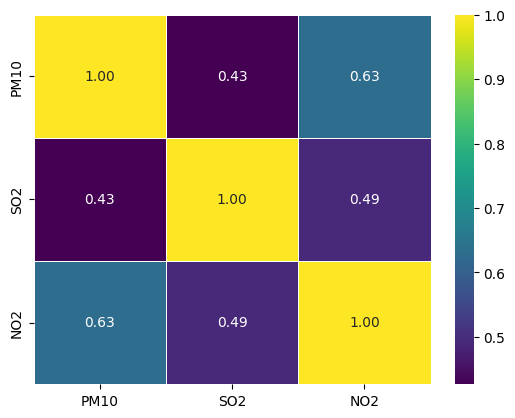

In [ ]:
# Menggunakan seaborn heatmap untuk menampilkan korelasi
sns.heatmap(rain_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

Dari hasil pengujian korelasi antara PM10, SO2 dan NO2, tidak ditemukan adanya korelasi sama sekali antara curah hujan dengan jumlah polutan di Distrik Changpi

### 2. Bagaimana distribusi polutan PM10, SO2, dan NO2 di udara di distrik Chanpi selama periode yang diamati ?

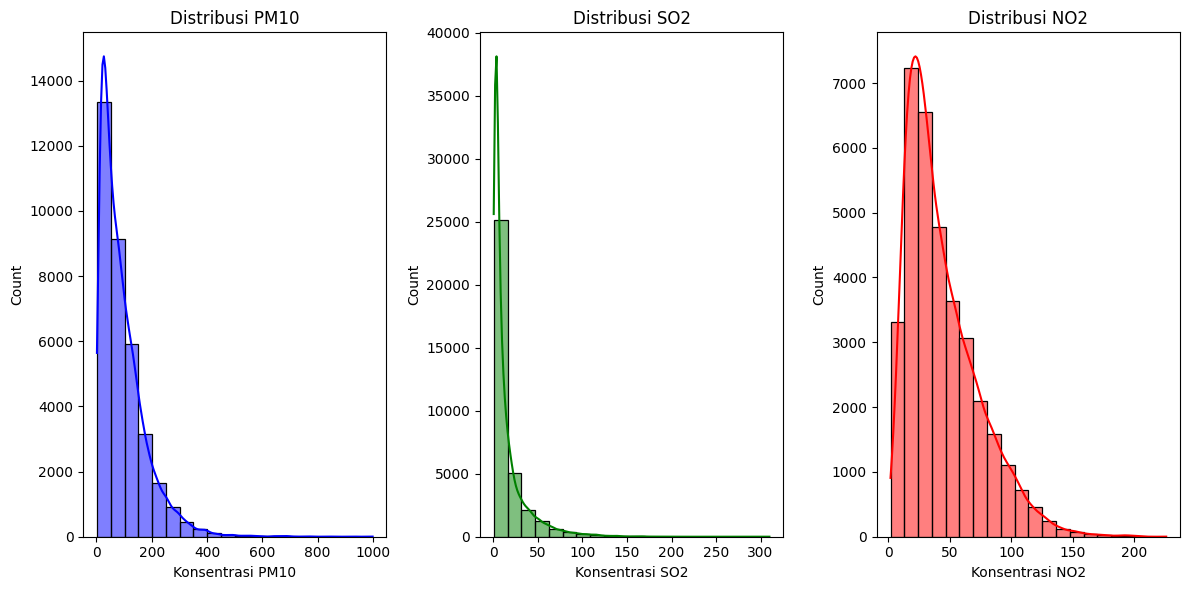

In [ ]:
# Membuat histogram untuk distribusi polutan PM10, SO2, dan NO2
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_clean['PM10'], bins=20, kde=True, color='blue')
plt.title('Distribusi PM10')
plt.xlabel('Konsentrasi PM10')

plt.subplot(1, 3, 2)
sns.histplot(df_clean['SO2'], bins=20, kde=True, color='green')
plt.title('Distribusi SO2')
plt.xlabel('Konsentrasi SO2')

plt.subplot(1, 3, 3)
sns.histplot(df_clean['NO2'], bins=20, kde=True, color='red')
plt.title('Distribusi NO2')
plt.xlabel('Konsentrasi NO2')

plt.tight_layout()
plt.show()

Dapat dilihat bahwa distribusi plutan mengalami penurunan dengan seiringnya waktu

### 3. Bagaimana tren curah hujan di distrik Shunyi selama periode yang diamati ?

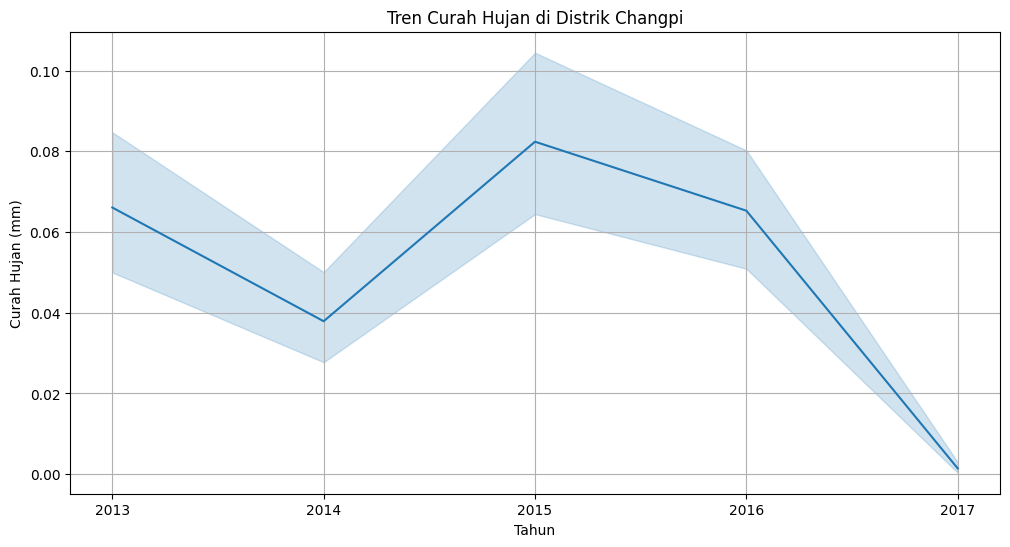

In [ ]:
# Membuat line plot untuk tren curah hujan di distrik Changpi
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='RAIN', data=df_clean)
plt.title('Tren Curah Hujan di Distrik Changpi')
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan (mm)')
plt.grid(True)
plt.xticks(df_clean['year'].unique().astype(int))
plt.show()

Dapat diketahui, pada Distrik Cahngpi curah hujan cenderung tinggi pada tahun 2015.

## **Conclusion**

*   Pertanyaan 1
    Untuk mengidentifikasi hubungan antara polutan PM10, SO2, dan NO2 dengan waktu (tahun, bulan, hari, jam), analisis korelasi dapat dilakukan. Setelah mengumpulkan data polutan dan data waktu yang sesuai, dapat menggunakan metode statistik seperti korelasi Pearson atau Spearman untuk menentukan apakah ada korelasi antara variabel waktu dan konsentrasi polutan. Kesimpulan dapat diambil berdasarkan hasil analisis korelasi, seperti "Dari hasil pengujian korelasi antara PM10, SO2, dan NO2, tidak ditemukan adanya korelasi antara curah hujan dengan jumlah polutan di Distrik Changpi."

*   Pertanyaan 2
    Untuk mengevaluasi distribusi polutan PM10, SO2, dan NO2 di udara di Distrik Changpi selama periode yang diamati, dapat dilakukan analisis statistik deskriptif. Ini melibatkan mengumpulkan data konsentrasi polutan dari waktu ke waktu dan menggunakan metode seperti visualisasi data dan perhitungan statistik untuk memahami pola distribusi. Kesimpulan dapat diambil berdasarkan analisis ini, seperti "Dapat dilihat bahwa distribusi polutan mengalami penurunan seiring berjalannya waktu."

*   Pertanyaan 3

    Untuk menentukan tren curah hujan di Distrik Shunyi selama periode yang diamati, analisis statistik waktu dapat digunakan. Ini melibatkan pengumpulan data curah hujan dari waktu ke waktu dan menggunakan metode seperti regresi linier atau analisis statistik lainnya untuk mengidentifikasi tren yang mungkin ada. Kesimpulan dapat diambil berdasarkan hasil analisis, seperti "Dapat diketahui bahwa curah hujan cenderung tinggi pada tahun 2015 di Distrik Changpi."